In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\saikiran\\Desktop\\py\\Udemy_ML\\DATA\\Advertising.csv")
df.dropna(inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
X = df.drop('sales',axis=1)
y = df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [8]:
poly_features.shape

(200, 9)

In [9]:
X.shape

(200, 3)

In [10]:
X.shape

(200, 3)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#help(train_test_split)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
X_train.shape

(140, 9)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
test_perd = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE= mean_absolute_error(y_test, test_perd)
MAE

0.48967980448035886

In [23]:
mse = mean_squared_error(y_test, test_perd)
mse

0.44175055104033895

In [24]:
rmse = np.sqrt(mse)
rmse

0.6646431757269

In [25]:
test_resuduals = y_test - test_perd
test_resuduals

37     0.751438
109    0.465197
31    -0.419282
89    -0.062863
66     1.597891
119   -0.341438
54     0.066273
74    -0.500927
145   -0.268890
142   -0.025518
148    1.453855
112    0.000646
174   -0.555135
55     0.307460
141   -0.475084
149    0.943737
25    -0.116373
34     0.218504
170   -0.046040
39    -0.155881
172    0.549297
153   -0.358542
175   -0.267164
61    -0.386893
65     0.268206
50    -0.410702
42     0.273699
129    0.506094
179   -0.147952
2      0.656593
12     0.537058
133   -0.600474
90     0.263262
22    -1.246391
41    -1.179394
32     0.123406
125    0.257579
196    0.034296
158   -0.133479
180   -0.535613
16    -0.157310
186   -0.354599
144    0.190285
121   -0.461990
80     0.417750
18     1.026687
78    -0.855733
48    -0.708934
4     -0.460929
15    -0.318393
1     -0.003897
43    -0.316227
102    0.563778
164    0.027632
9     -1.084636
155   -2.422177
36     0.362211
190    1.264923
33     0.020734
45    -0.853436
Name: sales, dtype: float64

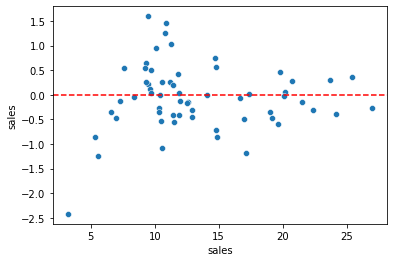

In [26]:
sns.scatterplot(x= y_test, y = test_resuduals)
#random
plt.axhline(y = 0, color = "r", ls="--")

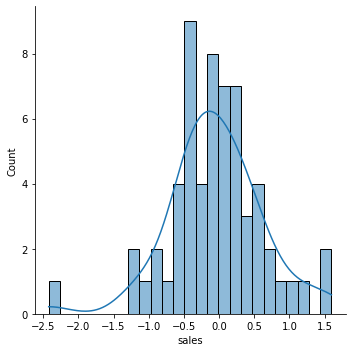

In [27]:
sns.displot(test_resuduals,bins=25 ,kde = "True")

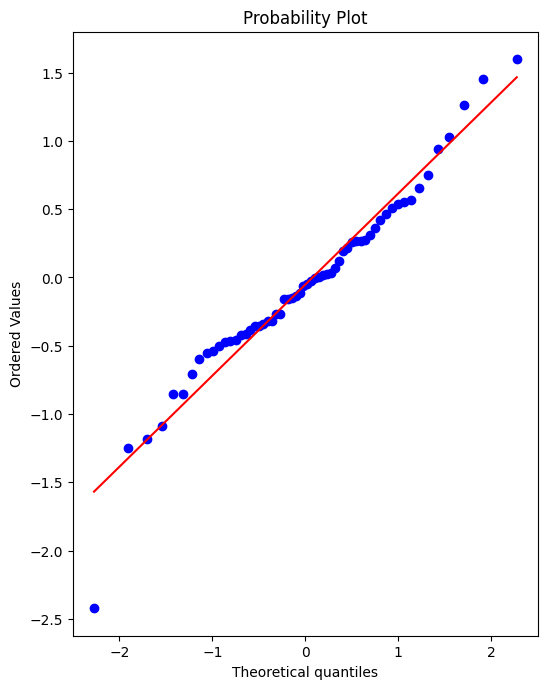

In [28]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_resuduals,plot=ax)

In [29]:
train_rmse_error = []
test_rmse_error = []


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


for n in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=n, include_bias=False)
    poly_feature = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)


    test_mse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_mse = np.sqrt(mean_squared_error(y_train, train_pred))


    test_rmse_error.append(test_mse)
    train_rmse_error.append(train_mse)

    

In [30]:
train_rmse_error

[1.734594124329376,
 0.5879574085292234,
 0.4339344356902067,
 0.3517083688399345,
 0.2509342920355839,
 0.1940630535738855,
 5.421705891465096,
 0.14320513075967775,
 0.1725152046623904]

In [31]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269,
 0.5803286825225046,
 0.5077742636722449,
 2.575818164530007,
 4.305903206969613,
 1379.0990147451773,
 4212.9967596479455,
 95995.41492818364]

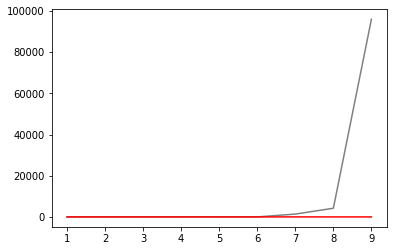

In [32]:
plt.plot(range(1,10), test_rmse_error, color ='gray')
plt.plot(range(1,10), train_rmse_error, color = 'red')

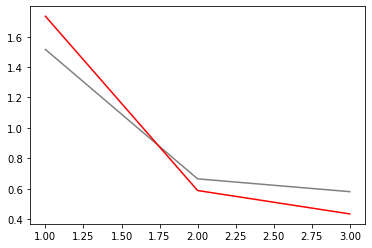

In [33]:
plt.plot(range(1,4), test_rmse_error[:3], color ='gray')
plt.plot(range(1,4), train_rmse_error[:3], color = 'red')

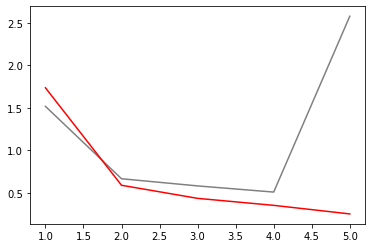

In [34]:
plt.plot(range(1,6), test_rmse_error[:5], color ='gray')
plt.plot(range(1,6), train_rmse_error[:5], color = 'red')

In [35]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()

In [36]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [37]:
from joblib import dump, load


In [38]:
dump(final_model, 'sales_poly_model.joblib') 


['sales_poly_model.joblib']

In [39]:
dump(final_poly_converter,'poly_converter.joblib')


['poly_converter.joblib']

In [40]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [41]:
campaign = [[149,22,12]]
campaign_poly = loaded_poly.transform(campaign)
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [42]:
final_model.predict(campaign_poly)

array([14.64501014])